# Introduction
The aim of this project is to compare the sentimens of stock market news with stock prices and figure out the relation between two different datasets.I will try to answer **"Is there any relationship between stock market news and stock market prices?"**

I will get the news by web scraping on [The Business Times](https://www.businesstimes.com.sg/). I will analyse **Facebook, Amazon, Apple, Tesla and Netflix** companies.

##Importing Libraries

In [ ]:
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
import string
import re
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

plt.style.use('fivethirtyeight')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Getting the News and Stock Prices

In [ ]:
def scraper(query):

  """This functions extracts news headline, summaries, dates and urls from Business Times website and creates a dataframe."""

  from urllib.request import urlopen
  from bs4 import BeautifulSoup
  import pandas as pd
  import time
  from time import sleep
  
  urls = []
  dates = []
  headlines = []
  summaries = []
  
  for i in range(1,11):
        
       page = urlopen("https://www.businesstimes.com.sg/search/"+str(query)+"?page="+str(i)).read()
       soup = BeautifulSoup(page, features="html.parser")
       all_news = soup.findAll("div", {"class": "media-body"})
        
       for news in all_news:

           time.sleep(1)
         
           url = news.a['href']
           urls.append(url)
         
           date = news.time.text
           dates.append(date)
         
           headline = news.a.text
           headlines.append(headline)
         
           summary = news.p.text
           summaries.append(summary)
      
  news_dict = {'date':dates,'headline':headlines,'summary':summaries,'url':urls}
  news_df = pd.DataFrame(data=news_dict) 
  
  return news_df

### Facebook

In [ ]:
fb_df = scraper('facebook')

In [ ]:
fb_df.head()

,date,headline,summary,url
0,12 Dec 2020,"Yes, Facebook has become a menace","IT'S about time, even if it's been a very long...",https://www.businesstimes.com.sg/opinion/yes-f...
1,10 Dec 2020,US crackdown on Facebook gets thumbs up from E...,"[BRUSSELS] Margrethe Vestager, the European Un...",https://www.businesstimes.com.sg/technology/us...
2,10 Dec 2020,Facebook antitrust suits seek to divest Instag...,[WASHINGTON] US federal and state antitrust en...,https://www.businesstimes.com.sg/technology/fa...
3,10 Dec 2020,"Google, Facebook win concession in law to pay ...",GOOGLE and Facebook Inc won a key concession i...,https://www.businesstimes.com.sg/consumer/goog...
4,09 Dec 2020,"Google, Facebook win key concession in law to ...",[SYDNEY] Google and Facebook won a key concess...,https://www.businesstimes.com.sg/consumer/goog...


In [ ]:
fb_df.tail()

,date,headline,summary,url
95,03 Jul 2020,"Facebook, YouTube, Twitter to face same EU rul...","[BRUSSELS] Facebook, Alphabet-owned YouTube, T...",https://www.businesstimes.com.sg/technology/fa...
96,03 Jul 2020,Facebook to advise use of masks amid latest vi...,[WASHINGTON] Facebook said on Thursday it woul...,https://www.businesstimes.com.sg/technology/fa...
97,01 Jul 2020,Facebook frustrates advertisers as boycott ove...,[NEW YORK] Advertisements for more than 400 br...,https://www.businesstimes.com.sg/technology/fa...
98,01 Jul 2020,"Volkswagen, Adidas, Puma join Facebook ad boyc...","[FRANKFURT AM MAIN] German giants Volkswagen, ...",https://www.businesstimes.com.sg/technology/vo...
99,30 Jun 2020,Facebook co-founder's B Capital closes second ...,B CAPITAL Group has closed its US$820 million ...,https://www.businesstimes.com.sg/garage/facebo...


In [ ]:
fb_df.shape

(100, 4)

In [ ]:
fb_df.to_csv("/content/drive/MyDrive/Data Science/Stock News Scraping & Analysis/datasets/facebook_news.csv", index=True)

In [ ]:
fb_stock = web.DataReader('FB', data_source='yahoo', start='2020-06-30',end='2020-12-12')
fb_stock.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-30,227.500000,218.470001,220.589996,227.070007,33927100,227.070007
2020-07-01,239.000000,227.559998,228.500000,237.550003,43399700,237.550003
2020-07-02,240.000000,232.610001,239.000000,233.419998,30633600,233.419998
2020-07-06,240.399994,232.270004,233.759995,240.279999,26206200,240.279999
2020-07-07,247.649994,238.820007,239.410004,240.860001,27887800,240.860001


In [ ]:
fb_stock.to_csv("/content/drive/MyDrive/Data Science/Stock News Scraping & Analysis/datasets/facebook_stocks.csv", index=True)

### Amazon

In [ ]:
amzn_df = scraper('amazon')

In [ ]:
amzn_df.head()

,date,headline,summary,url
0,11 Dec 2020,"Google, Amazon fined total of 135 million euro...",GOOGLE racked up another record fine in the Eu...,https://www.businesstimes.com.sg/technology/go...
1,10 Dec 2020,"Google, Amazon fined 100m euros by French data...",[LUXEMBOURG] Google racked up another record E...,https://www.businesstimes.com.sg/technology/go...
2,09 Dec 2020,Amazon eyes potential US$100m investment in In...,[BENGALURU] Amazon.com Inc is considering a ne...,https://www.businesstimes.com.sg/consumer/amaz...
3,04 Dec 2020,More than 400 lawmakers from 34 countries back...,[LONDON] More than 400 lawmakers from 34 count...,https://www.businesstimes.com.sg/consumer/more...
4,02 Dec 2020,"BlackBerry, Amazon team up on smart car softwa...",[SAN FRANCISCO] BlackBerry and Amazon on Tuesd...,https://www.businesstimes.com.sg/transport/bla...


In [ ]:
amzn_df.tail()

,date,headline,summary,url
95,11 Jul 2020,"Netflix, Amazon and Nvidia get Street-high tar...",[NEW YORK] A trio of companies that have been ...,https://www.businesstimes.com.sg/technology/ne...
96,11 Jul 2020,Amazon's Kuiper satellite plan wins backing of...,[WASHINGTON] Amazon.com's plan for a fleet of ...,https://www.businesstimes.com.sg/technology/am...
97,11 Jul 2020,"Amazon.com bans, then un-bans TikTok app from ...",[SAN FRANCISCO] In the span of a few hours on ...,https://www.businesstimes.com.sg/technology/am...
98,08 Jul 2020,Amazon India's unit gets 23.1b rupees in fresh...,[BENGALURU] Amazon.com has invested 23.10 bill...,https://www.businesstimes.com.sg/technology/am...
99,07 Jul 2020,"Indonesia imposes 10% VAT on Amazon, Google, N...",[JAKARTA] Indonesia imposed a 10 per cent valu...,https://www.businesstimes.com.sg/government-ec...


In [ ]:
amzn_df.shape

(100, 4)

In [ ]:
amzn_df.to_csv("/content/drive/MyDrive/Data Science/Stock News Scraping & Analysis/datasets/amazon_news.csv", index=True)

In [ ]:
amzn_stock = web.DataReader('AMZN', data_source='yahoo', start='2020-07-07',end='2020-12-12')
amzn_stock.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-07-07,3069.550049,2990.000000,3058.550049,3000.120117,5257500,3000.120117
2020-07-08,3083.969971,3012.429932,3022.610107,3081.110107,5037600,3081.110107
2020-07-09,3193.879883,3074.000000,3115.989990,3182.629883,6388700,3182.629883
2020-07-10,3215.000000,3135.699951,3191.760010,3200.000000,5486000,3200.000000
2020-07-13,3344.290039,3068.389893,3251.060059,3104.000000,7720400,3104.000000


In [ ]:
amzn_stock.to_csv("/content/drive/MyDrive/Data Science/Stock News Scraping & Analysis/datasets/amazon_stocks.csv", index=True)

### Apple

In [ ]:
apple_df = scraper('apple')

In [ ]:
apple_df.head()

,date,headline,summary,url
0,12 Dec 2020,Apple's greatest chip challenge yet: replacing...,[SAN FRANCISCO] Apple has become a chip powerh...,https://www.businesstimes.com.sg/technology/ap...
1,08 Dec 2020,Apple could block apps that don't comply with ...,[STOCKHOLM] Apple threatened on Tuesday to rem...,https://www.businesstimes.com.sg/consumer/appl...
2,08 Dec 2020,Apple launches US$550 over-ear headphones into...,[CUPERTINO] Apple launched its first over-ear ...,https://www.businesstimes.com.sg/technology/ap...
3,04 Dec 2020,Apple Pay targeted in Dutch antitrust probe in...,[AMSTERDAM] Apple phones face scrutiny from Du...,https://www.businesstimes.com.sg/consumer/appl...
4,01 Dec 2020,Amazon unveils cloud service to power Apple ap...,[SEATTLE] Amazon.com's cloud business unveiled...,https://www.businesstimes.com.sg/technology/am...


In [ ]:
apple_df.tail()

,date,headline,summary,url
95,01 Aug 2020,Apple buys startup to turn iPhones into paymen...,[CUPERTINO] Apple Inc has acquired Mobeewave I...,https://www.businesstimes.com.sg/garage/apple-...
96,31 Jul 2020,"Huawei, Apple gain bigger share of shrinking C...",[SHENZHEN] Huawei Technologies and Apple both ...,https://www.businesstimes.com.sg/consumer/huaw...
97,31 Jul 2020,"Apple delivers blowout earnings amid Covid-19,...",[CALIFORNIA] Apple on Thursday delivered blowo...,https://www.businesstimes.com.sg/technology/ap...
98,21 Jul 2020,Apple pledges to be fully carbon neutral by 2030,[SAN FRANCISCO] Apple pledged Tuesday to be ca...,https://www.businesstimes.com.sg/consumer/appl...
99,21 Jul 2020,Microsoft president raised Apple issues to US ...,[SEATTLE] Microsoft President Brad Smith raise...,https://www.businesstimes.com.sg/technology/mi...


In [ ]:
apple_df.shape

(100, 4)

In [ ]:
apple_df.to_csv("/content/drive/MyDrive/Data Science/Stock News Scraping & Analysis/datasets/apple_news.csv", index=True)

In [ ]:
apple_stock = web.DataReader('AAPL', data_source='yahoo', start='2020-07-21',end='2020-12-12')
apple_stock.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-07-21,99.250000,96.742500,99.172501,97.000000,103646000.0,96.658661
2020-07-22,97.974998,96.602501,96.692497,97.272499,89001600.0,96.930199
2020-07-23,97.077499,92.010002,96.997498,92.845001,197004400.0,92.518288
2020-07-24,92.970001,89.144997,90.987503,92.614998,185438800.0,92.289093
2020-07-27,94.904999,93.480003,93.709999,94.809998,121214000.0,94.476364


In [ ]:
apple_stock.to_csv("/content/drive/MyDrive/Data Science/Stock News Scraping & Analysis/datasets/apple_stocks.csv", index=True)

### Tesla

In [ ]:
tesla_df = scraper('tesla')

In [ ]:
tesla_df.head()

,date,headline,summary,url
0,13 Dec 2020,Are Tesla's shares worth US$90 or US$780? Wall...,[NEW YORK] For all the headline-making drama s...,https://www.businesstimes.com.sg/transport/are...
1,12 Dec 2020,"Short sellers crushed in 2020 as Tesla, Modern...",SHORT sellers won some high-profile victories ...,https://www.businesstimes.com.sg/wealth-invest...
2,09 Dec 2020,"No model for sale here, but India's small inve...",[MUMBAI] Mom-and-pop Indian investors increasi...,https://www.businesstimes.com.sg/stocks/no-mod...
3,08 Dec 2020,Tesla raising up to US$5b in third share sale ...,[SAN CARLOS] Tesla is taking advantage of its ...,https://www.businesstimes.com.sg/transport/tes...
4,04 Dec 2020,Tesla skeptic regrets betting against Musk: re...,[NEW YORK] Prominent investor Jim Chanos ackno...,https://www.businesstimes.com.sg/transport/tes...


In [ ]:
tesla_df.tail()

,date,headline,summary,url
95,25 Feb 2020,Tesla rival sets out to banish 160-year-old le...,YOUR sleek new Tesla Model S or electronic BMW...,https://www.businesstimes.com.sg/transport/tes...
96,21 Feb 2020,Tesla gets court approval to clear forest for ...,[BERLIN] Tesla Inc got approval from a German ...,https://www.businesstimes.com.sg/transport/tes...
97,17 Feb 2020,Big run in Tesla a warning for dull Singapore ...,AFTER hearing about all the money that some of...,https://www.businesstimes.com.sg/companies-mar...
98,14 Feb 2020,Tesla shifts gears with plans to issue more sh...,[SAN FRANCISCO] Tesla shifted gears on Thursda...,https://www.businesstimes.com.sg/transport/tes...
99,07 Feb 2020,Europe pushes on with gigafactory plan to riva...,[BERLIN] Germany and France set out a blueprin...,https://www.businesstimes.com.sg/transport/eur...


In [ ]:
tesla_df.shape

(100, 4)

In [ ]:
tesla_df.to_csv("/content/drive/MyDrive/Data Science/Stock News Scraping & Analysis/datasets/tesla_news.csv", index=True)

In [ ]:
tesla_stock = web.DataReader('TSLA', data_source='yahoo', start='2020-02-07',end='2020-12-12')
tesla_stock.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-02-07,153.949997,146.000000,146.110001,149.613998,85317500.0,149.613998
2020-02-10,163.998001,150.479996,160.000000,154.255997,123446000.0,154.255997
2020-02-11,156.701996,151.600006,153.757996,154.876007,58487500.0,154.876007
2020-02-12,157.949997,152.673996,155.574005,153.457993,60112500.0,153.457993
2020-02-13,163.600006,147.000000,148.367996,160.800003,131446500.0,160.800003


In [ ]:
tesla_stock.to_csv("/content/drive/MyDrive/Data Science/Stock News Scraping & Analysis/datasets/tesla_stocks.csv", index=True)

### Netflix

In [ ]:
netflix_df = scraper('netflix')

In [ ]:
netflix_df.head()

,date,headline,summary,url
0,09 Dec 2020,Viacom poised to win suit over Netflix talent ...,[LOS ANGELES] A ViacomCBS unit is poised to wi...,https://www.businesstimes.com.sg/consumer/viac...
1,04 Dec 2020,Netflix hit 'The Crown' blasted for anti-Charl...,[LONDON] The fourth season of Netflix hit The ...,https://www.businesstimes.com.sg/life-culture/...
2,03 Dec 2020,Netflix plans to double its spending on origin...,NETFLIX Inc is planning to double its spending...,https://www.businesstimes.com.sg/consumer/netf...
3,03 Nov 2020,Will Mank be Netflix's first Best Picture winner?,CITIZEN Kane has cast a vast cinematic shadow ...,https://www.businesstimes.com.sg/life-culture/...
4,24 Oct 2020,Apple and Netflix discussed acquiring 'Bond' m...,[LOS ANGELES] Metro-Goldwyn-Mayer held discuss...,https://www.businesstimes.com.sg/technology/ap...


In [ ]:
netflix_df.tail()

,date,headline,summary,url
95,19 Oct 2018,Netflix takes cash-fuelled road to streaming d...,HERE are some notable numbers from Netflix:,https://www.businesstimes.com.sg/consumer/netf...
96,18 Oct 2018,Netflix's subscriber gains dazzle in Q3,NETFLIX INC analysts predict further growth ne...,https://www.businesstimes.com.sg/technology/ne...
97,17 Oct 2018,"Netflix crushes estimates with record quarter,...",[LOS ANGELES] Netflix's Cinderella story isn't...,https://www.businesstimes.com.sg/consumer/netf...
98,17 Oct 2018,"Netflix surges on user gains, strong profits",[SAN FRANCISCO] Netflix reported on Tuesday a ...,https://www.businesstimes.com.sg/consumer/netf...
99,16 Oct 2018,Bond bears see gains in shorting Netflix debt,"IN MARCH, noted shortseller Andrew Left took a...",https://www.businesstimes.com.sg/companies-mar...


In [ ]:
netflix_df.shape

(100, 4)

In [ ]:
netflix_df.to_csv("/content/drive/MyDrive/Data Science/Stock News Scraping & Analysis/datasets/netflix_news.csv", index=True)

In [ ]:
netflix_stock = web.DataReader('NFLX', data_source='yahoo', start='2018-10-16',end='2020-12-10')
netflix_stock.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-10-16,347.950012,330.559998,337.239990,346.399994,20156400,346.399994
2018-10-17,380.000000,356.500000,378.329987,364.700012,32610900,364.700012
2018-10-18,362.200012,346.049988,360.670013,346.709991,18461000,346.709991
2018-10-19,355.799988,332.200012,351.000000,332.670013,16717200,332.670013
2018-10-22,335.799988,320.339996,333.100006,329.540009,17097200,329.540009


In [ ]:
netflix_stock.to_csv("/content/drive/MyDrive/Data Science/Stock News Scraping & Analysis/datasets/netflix_stocks.csv", index=True)

## Analysis

In [ ]:
def text_cleaner(text):
    """
    Takes in a string of text, then performs the following:
    1. Makes the text lowercase
    2. Remove all punctuation
    3. Remove all stopwords
    4. Return the cleaned text
    """
    # let's make text lowercase
    text = text.lower()

    # Check characters to see if they are in punctuation
    nopunc = [char for char in text if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)

   
    # Now just remove any stopwords
    text = [word for word in nopunc.split() if word.lower() not in stop_words]
    text = " ".join(text)
    return text

### Facebook 

#### Pre-processing and Data Preparation

In [ ]:
fb_df.head()

,date,headline,summary,url
0,12 Dec 2020,"Yes, Facebook has become a menace","IT'S about time, even if it's been a very long...",https://www.businesstimes.com.sg/opinion/yes-f...
1,10 Dec 2020,US crackdown on Facebook gets thumbs up from E...,"[BRUSSELS] Margrethe Vestager, the European Un...",https://www.businesstimes.com.sg/technology/us...
2,10 Dec 2020,Facebook antitrust suits seek to divest Instag...,[WASHINGTON] US federal and state antitrust en...,https://www.businesstimes.com.sg/technology/fa...
3,10 Dec 2020,"Google, Facebook win concession in law to pay ...",GOOGLE and Facebook Inc won a key concession i...,https://www.businesstimes.com.sg/consumer/goog...
4,09 Dec 2020,"Google, Facebook win key concession in law to ...",[SYDNEY] Google and Facebook won a key concess...,https://www.businesstimes.com.sg/consumer/goog...


In [ ]:
fb_df['combined'] = fb_df['headline'] + ' ' + fb_df['summary']
fb_df.head()

,date,headline,summary,url,combined
0,12 Dec 2020,"Yes, Facebook has become a menace","IT'S about time, even if it's been a very long...",https://www.businesstimes.com.sg/opinion/yes-f...,"Yes, Facebook has become a menace IT'S about t..."
1,10 Dec 2020,US crackdown on Facebook gets thumbs up from E...,"[BRUSSELS] Margrethe Vestager, the European Un...",https://www.businesstimes.com.sg/technology/us...,US crackdown on Facebook gets thumbs up from E...
2,10 Dec 2020,Facebook antitrust suits seek to divest Instag...,[WASHINGTON] US federal and state antitrust en...,https://www.businesstimes.com.sg/technology/fa...,Facebook antitrust suits seek to divest Instag...
3,10 Dec 2020,"Google, Facebook win concession in law to pay ...",GOOGLE and Facebook Inc won a key concession i...,https://www.businesstimes.com.sg/consumer/goog...,"Google, Facebook win concession in law to pay ..."
4,09 Dec 2020,"Google, Facebook win key concession in law to ...",[SYDNEY] Google and Facebook won a key concess...,https://www.businesstimes.com.sg/consumer/goog...,"Google, Facebook win key concession in law to ..."


In [ ]:
fb_df['date'] = pd.to_datetime(fb_df['date']).dt.date
fb_df.head()

,date,headline,summary,url,combined
0,2020-12-12,"Yes, Facebook has become a menace","IT'S about time, even if it's been a very long...",https://www.businesstimes.com.sg/opinion/yes-f...,"Yes, Facebook has become a menace IT'S about t..."
1,2020-12-10,US crackdown on Facebook gets thumbs up from E...,"[BRUSSELS] Margrethe Vestager, the European Un...",https://www.businesstimes.com.sg/technology/us...,US crackdown on Facebook gets thumbs up from E...
2,2020-12-10,Facebook antitrust suits seek to divest Instag...,[WASHINGTON] US federal and state antitrust en...,https://www.businesstimes.com.sg/technology/fa...,Facebook antitrust suits seek to divest Instag...
3,2020-12-10,"Google, Facebook win concession in law to pay ...",GOOGLE and Facebook Inc won a key concession i...,https://www.businesstimes.com.sg/consumer/goog...,"Google, Facebook win concession in law to pay ..."
4,2020-12-09,"Google, Facebook win key concession in law to ...",[SYDNEY] Google and Facebook won a key concess...,https://www.businesstimes.com.sg/consumer/goog...,"Google, Facebook win key concession in law to ..."


In [ ]:
fb_df['clean'] = fb_df['combined'].apply(text_cleaner)
fb_df.head()

,date,headline,summary,url,combined,clean
0,2020-12-12,"Yes, Facebook has become a menace","IT'S about time, even if it's been a very long...",https://www.businesstimes.com.sg/opinion/yes-f...,"Yes, Facebook has become a menace IT'S about t...",yes facebook become menace time even long 22 y...
1,2020-12-10,US crackdown on Facebook gets thumbs up from E...,"[BRUSSELS] Margrethe Vestager, the European Un...",https://www.businesstimes.com.sg/technology/us...,US crackdown on Facebook gets thumbs up from E...,us crackdown facebook gets thumbs eus vestager...
2,2020-12-10,Facebook antitrust suits seek to divest Instag...,[WASHINGTON] US federal and state antitrust en...,https://www.businesstimes.com.sg/technology/fa...,Facebook antitrust suits seek to divest Instag...,facebook antitrust suits seek divest instagram...
3,2020-12-10,"Google, Facebook win concession in law to pay ...",GOOGLE and Facebook Inc won a key concession i...,https://www.businesstimes.com.sg/consumer/goog...,"Google, Facebook win concession in law to pay ...",google facebook win concession law pay news au...
4,2020-12-09,"Google, Facebook win key concession in law to ...",[SYDNEY] Google and Facebook won a key concess...,https://www.businesstimes.com.sg/consumer/goog...,"Google, Facebook win key concession in law to ...",google facebook win key concession law pay new...


In [ ]:
fb_stock['Change']=fb_stock['Close'].diff()
fb_stock.head()

,High,Low,Open,Close,Volume,Adj Close,Change
Date,,,,,,,
2020-06-30,227.500000,218.470001,220.589996,227.070007,33927100,227.070007,NaN
2020-07-01,239.000000,227.559998,228.500000,237.550003,43399700,237.550003,10.479996
2020-07-02,240.000000,232.610001,239.000000,233.419998,30633600,233.419998,-4.130005
2020-07-06,240.399994,232.270004,233.759995,240.279999,26206200,240.279999,6.860001
2020-07-07,247.649994,238.820007,239.410004,240.860001,27887800,240.860001,0.580002


In [ ]:
web.DataReader('FB', data_source='yahoo', start='2020-06-29',end='2020-06-29')

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-29,220.75,207.110001,209.75,220.639999,58514300,220.639999


In [ ]:
fb_stock.iloc[:1]['Change'] = fb_stock.iloc[:1]['Close'] - 220.639999
fb_stock.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,High,Low,Open,Close,Volume,Adj Close,Change
Date,,,,,,,
2020-06-30,227.500000,218.470001,220.589996,227.070007,33927100,227.070007,6.430008
2020-07-01,239.000000,227.559998,228.500000,237.550003,43399700,237.550003,10.479996
2020-07-02,240.000000,232.610001,239.000000,233.419998,30633600,233.419998,-4.130005
2020-07-06,240.399994,232.270004,233.759995,240.279999,26206200,240.279999,6.860001
2020-07-07,247.649994,238.820007,239.410004,240.860001,27887800,240.860001,0.580002


#### Sentiment Analysis

In [ ]:
fb_df['sentiment_score'] = fb_df['clean'].apply(lambda news: vader.polarity_scores(news)['compound'])
fb_df.head()

,date,headline,summary,url,combined,clean,sentiment_score
0,2020-12-12,"Yes, Facebook has become a menace","IT'S about time, even if it's been a very long...",https://www.businesstimes.com.sg/opinion/yes-f...,"Yes, Facebook has become a menace IT'S about t...",yes facebook become menace time even long 22 y...,0.2960
1,2020-12-10,US crackdown on Facebook gets thumbs up from E...,"[BRUSSELS] Margrethe Vestager, the European Un...",https://www.businesstimes.com.sg/technology/us...,US crackdown on Facebook gets thumbs up from E...,us crackdown facebook gets thumbs eus vestager...,0.4767
2,2020-12-10,Facebook antitrust suits seek to divest Instag...,[WASHINGTON] US federal and state antitrust en...,https://www.businesstimes.com.sg/technology/fa...,Facebook antitrust suits seek to divest Instag...,facebook antitrust suits seek divest instagram...,-0.5106
3,2020-12-10,"Google, Facebook win concession in law to pay ...",GOOGLE and Facebook Inc won a key concession i...,https://www.businesstimes.com.sg/consumer/goog...,"Google, Facebook win concession in law to pay ...",google facebook win concession law pay news au...,0.4588
4,2020-12-09,"Google, Facebook win key concession in law to ...",[SYDNEY] Google and Facebook won a key concess...,https://www.businesstimes.com.sg/consumer/goog...,"Google, Facebook win key concession in law to ...",google facebook win key concession law pay new...,0.4588


#### Visualisation

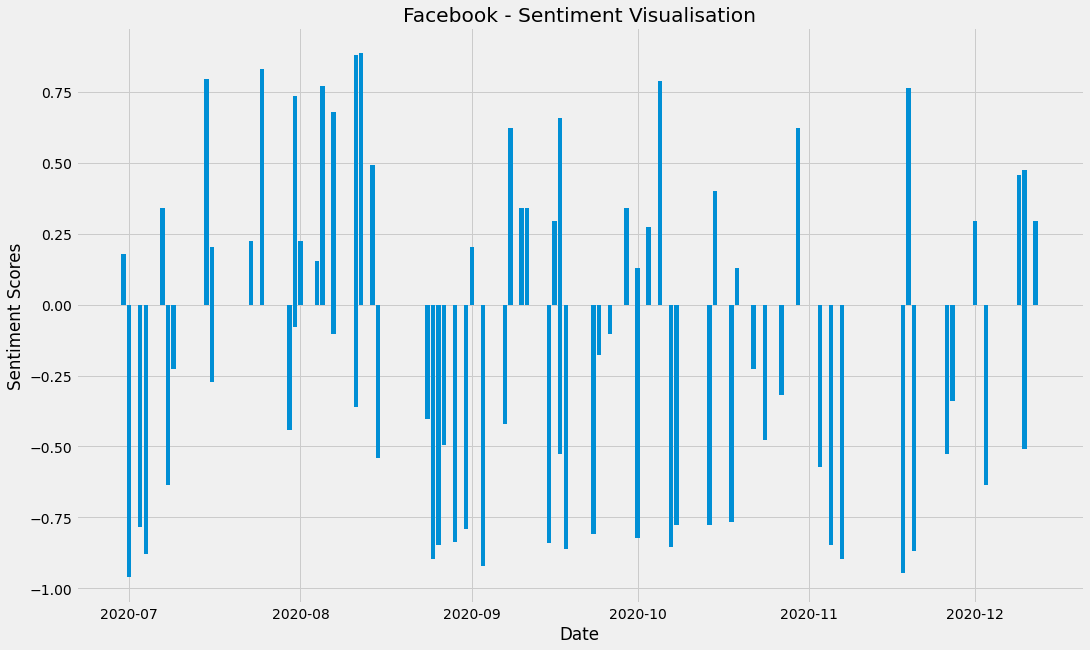

In [ ]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_axes([0,0,1,1])
ax.bar(fb_df['date'], fb_df['sentiment_score'])
ax.set_xlabel('Date')
ax.set_ylabel('Sentiment Scores')
ax.set_title('Facebook - Sentiment Visualisation')
plt.show()

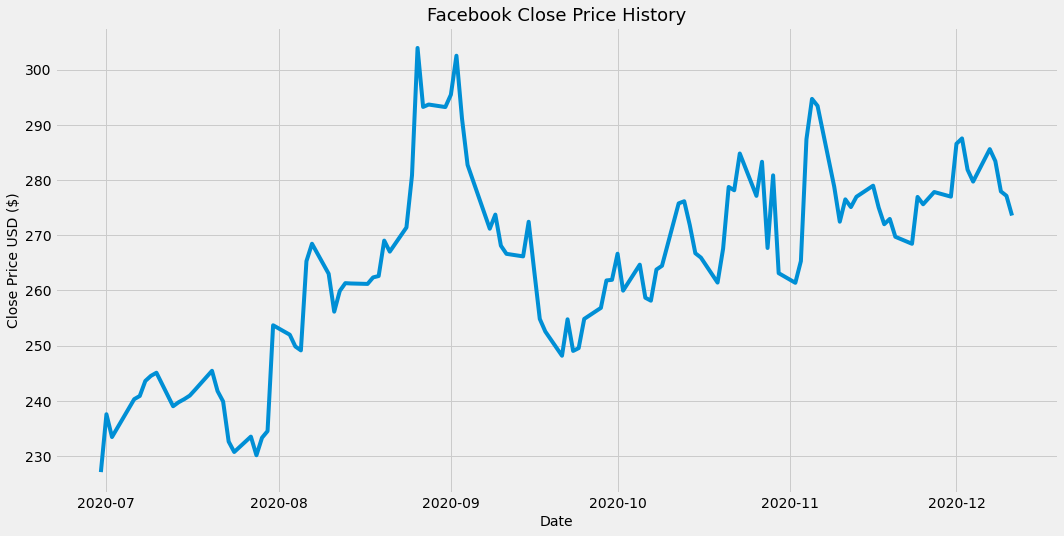

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(fb_stock['Close'])
plt.title('Facebook Close Price History',fontsize = 18)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Close Price USD ($)', fontsize = 14)
plt.show()

In [ ]:
fb_df.sentiment_score.sort_values()

97   -0.9607
16   -0.9460
53   -0.9201
62   -0.8979
17   -0.8979
       ...  
34    0.7906
90    0.7964
86    0.8316
70    0.8807
68    0.8860
Name: sentiment_score, Length: 100, dtype: float64

In [ ]:
fb_df[fb_df['sentiment_score']== -0.9201]

,date,headline,summary,url,combined,clean,sentiment_score
53,2020-09-03,Facebook bans Indian ruling party politician f...,[NEW DELHI] Facebook has banned a member of In...,https://www.businesstimes.com.sg/technology/fa...,Facebook bans Indian ruling party politician f...,facebook bans indian ruling party politician p...,-0.9201


In [ ]:
print(fb_df.iloc[53]['combined'])

Facebook bans Indian ruling party politician for policy violation [NEW DELHI] Facebook has banned a member of India's ruling party for violating its policies covering violence and hate, as Mark Zuckerberg's company finds itself caught in a debate over how it handles political content in its biggest market.



In [ ]:
fb_stock[fb_stock.index == '2020-09-03']

,High,Low,Open,Close,Volume,Adj Close,Change
Date,,,,,,,
2020-09-03,297.600006,283.630005,295.98999,291.119995,32294100,291.119995,-11.380005


In [ ]:
fb_df[fb_df['sentiment_score']== 0.8807]

,date,headline,summary,url,combined,clean,sentiment_score
70,2020-08-11,Facebook creates unit devoted to financial ser...,[SAN FRANCISCO] Facebook on Monday said it has...,https://www.businesstimes.com.sg/technology/fa...,Facebook creates unit devoted to financial ser...,facebook creates unit devoted financial servic...,0.8807


In [ ]:
print(fb_df.iloc[70]['combined'])

Facebook creates unit devoted to financial services [SAN FRANCISCO] Facebook on Monday said it has created a new unit devoted to financial services to harmonize payment systems on its platform.



In [ ]:
fb_stock[fb_stock.index == '2020-08-12']

,High,Low,Open,Close,Volume,Adj Close,Change
Date,,,,,,,
2020-08-12,263.899994,258.109985,258.970001,259.890015,21428300,259.890015,3.76001


### Amazon

#### Pre-processing and Data Preparation

In [ ]:
amzn_df.head()

,date,headline,summary,url
0,11 Dec 2020,"Google, Amazon fined total of 135 million euro...",GOOGLE racked up another record fine in the Eu...,https://www.businesstimes.com.sg/technology/go...
1,10 Dec 2020,"Google, Amazon fined 100m euros by French data...",[LUXEMBOURG] Google racked up another record E...,https://www.businesstimes.com.sg/technology/go...
2,09 Dec 2020,Amazon eyes potential US$100m investment in In...,[BENGALURU] Amazon.com Inc is considering a ne...,https://www.businesstimes.com.sg/consumer/amaz...
3,04 Dec 2020,More than 400 lawmakers from 34 countries back...,[LONDON] More than 400 lawmakers from 34 count...,https://www.businesstimes.com.sg/consumer/more...
4,02 Dec 2020,"BlackBerry, Amazon team up on smart car softwa...",[SAN FRANCISCO] BlackBerry and Amazon on Tuesd...,https://www.businesstimes.com.sg/transport/bla...


In [ ]:
amzn_df['combined'] = amzn_df['headline'] + ' ' + amzn_df['summary']
amzn_df['date'] = pd.to_datetime(amzn_df['date']).dt.date
amzn_df['clean'] = amzn_df['combined'].apply(text_cleaner)
amzn_df.head()

,date,headline,summary,url,combined,clean
0,2020-12-11,"Google, Amazon fined total of 135 million euro...",GOOGLE racked up another record fine in the Eu...,https://www.businesstimes.com.sg/technology/go...,"Google, Amazon fined total of 135 million euro...",google amazon fined total 135 million euros fr...
1,2020-12-10,"Google, Amazon fined 100m euros by French data...",[LUXEMBOURG] Google racked up another record E...,https://www.businesstimes.com.sg/technology/go...,"Google, Amazon fined 100m euros by French data...",google amazon fined 100m euros french data wat...
2,2020-12-09,Amazon eyes potential US$100m investment in In...,[BENGALURU] Amazon.com Inc is considering a ne...,https://www.businesstimes.com.sg/consumer/amaz...,Amazon eyes potential US$100m investment in In...,amazon eyes potential us100m investment indias...
3,2020-12-04,More than 400 lawmakers from 34 countries back...,[LONDON] More than 400 lawmakers from 34 count...,https://www.businesstimes.com.sg/consumer/more...,More than 400 lawmakers from 34 countries back...,400 lawmakers 34 countries back make amazon pa...
4,2020-12-02,"BlackBerry, Amazon team up on smart car softwa...",[SAN FRANCISCO] BlackBerry and Amazon on Tuesd...,https://www.businesstimes.com.sg/transport/bla...,"BlackBerry, Amazon team up on smart car softwa...",blackberry amazon team smart car software plat...


In [ ]:
amzn_stock['Change']=amzn_stock['Close'].diff()
amzn_stock.head()

,High,Low,Open,Close,Volume,Adj Close,Change
Date,,,,,,,
2020-07-07,3069.550049,2990.000000,3058.550049,3000.120117,5257500,3000.120117,NaN
2020-07-08,3083.969971,3012.429932,3022.610107,3081.110107,5037600,3081.110107,80.989990
2020-07-09,3193.879883,3074.000000,3115.989990,3182.629883,6388700,3182.629883,101.519775
2020-07-10,3215.000000,3135.699951,3191.760010,3200.000000,5486000,3200.000000,17.370117
2020-07-13,3344.290039,3068.389893,3251.060059,3104.000000,7720400,3104.000000,-96.000000


In [ ]:
web.DataReader('AMZN', data_source='yahoo', start='2020-07-06',end='2020-07-06')

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-07-06,3059.879883,2930,2934.969971,3057.040039,6880600,3057.040039


In [ ]:
amzn_stock.iloc[:1]['Change'] = amzn_stock.iloc[:1]['Close'] - 3057.040039
amzn_stock.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,High,Low,Open,Close,Volume,Adj Close,Change
Date,,,,,,,
2020-07-07,3069.550049,2990.000000,3058.550049,3000.120117,5257500,3000.120117,-56.919922
2020-07-08,3083.969971,3012.429932,3022.610107,3081.110107,5037600,3081.110107,80.989990
2020-07-09,3193.879883,3074.000000,3115.989990,3182.629883,6388700,3182.629883,101.519775
2020-07-10,3215.000000,3135.699951,3191.760010,3200.000000,5486000,3200.000000,17.370117
2020-07-13,3344.290039,3068.389893,3251.060059,3104.000000,7720400,3104.000000,-96.000000


#### Sentiment Analysis

In [ ]:
amzn_df['sentiment_score'] = amzn_df['clean'].apply(lambda news: vader.polarity_scores(news)['compound'])
amzn_df.head()

,date,headline,summary,url,combined,clean,sentiment_score
0,2020-12-11,"Google, Amazon fined total of 135 million euro...",GOOGLE racked up another record fine in the Eu...,https://www.businesstimes.com.sg/technology/go...,"Google, Amazon fined total of 135 million euro...",google amazon fined total 135 million euros fr...,-0.1280
1,2020-12-10,"Google, Amazon fined 100m euros by French data...",[LUXEMBOURG] Google racked up another record E...,https://www.businesstimes.com.sg/technology/go...,"Google, Amazon fined 100m euros by French data...",google amazon fined 100m euros french data wat...,-0.1280
2,2020-12-09,Amazon eyes potential US$100m investment in In...,[BENGALURU] Amazon.com Inc is considering a ne...,https://www.businesstimes.com.sg/consumer/amaz...,Amazon eyes potential US$100m investment in In...,amazon eyes potential us100m investment indias...,0.1779
3,2020-12-04,More than 400 lawmakers from 34 countries back...,[LONDON] More than 400 lawmakers from 34 count...,https://www.businesstimes.com.sg/consumer/more...,More than 400 lawmakers from 34 countries back...,400 lawmakers 34 countries back make amazon pa...,0.1027
4,2020-12-02,"BlackBerry, Amazon team up on smart car softwa...",[SAN FRANCISCO] BlackBerry and Amazon on Tuesd...,https://www.businesstimes.com.sg/transport/bla...,"BlackBerry, Amazon team up on smart car softwa...",blackberry amazon team smart car software plat...,0.7351


#### Visualisation

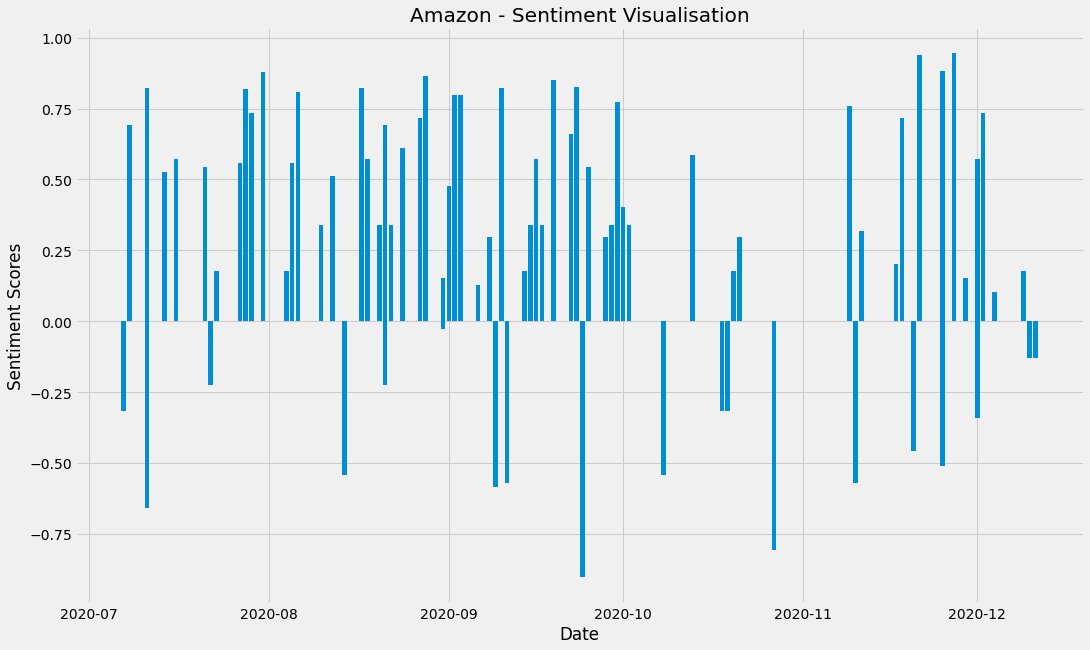

In [ ]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_axes([0,0,1,1])
ax.bar(amzn_df['date'], amzn_df['sentiment_score'])
ax.set_xlabel('Date')
ax.set_ylabel('Sentiment Scores')
ax.set_title('Amazon - Sentiment Visualisation')
plt.show()

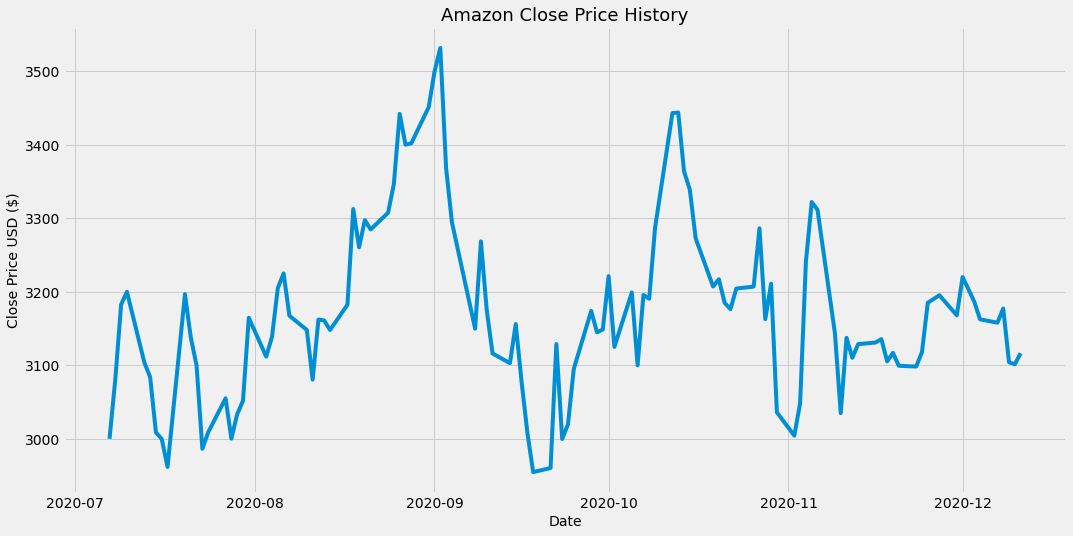

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(amzn_stock['Close'])
plt.title('Amazon Close Price History',fontsize = 18)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Close Price USD ($)', fontsize = 14)
plt.show()

In [ ]:
amzn_df['sentiment_score'].sort_values()

39   -0.9022
20   -0.8074
97   -0.6597
53   -0.5859
49   -0.5719
       ...  
64    0.8658
85    0.8779
12    0.8834
13    0.9403
9     0.9442
Name: sentiment_score, Length: 100, dtype: float64

In [ ]:
amzn_df[amzn_df['sentiment_score']== -0.9022]

,date,headline,summary,url,combined,clean,sentiment_score
39,2020-09-24,"Netflix, Amazon Prime are latest weapons in In...","[MUMBAI] India's telecom price war is back, an...",https://www.businesstimes.com.sg/technology/ne...,"Netflix, Amazon Prime are latest weapons in In...",netflix amazon prime latest weapons indias tel...,-0.9022


In [ ]:
print(amzn_df.iloc[39]['combined'])

Netflix, Amazon Prime are latest weapons in India's telecom war [MUMBAI] India's telecom price war is back, and this time the battle is being fought with freebies.



In [ ]:
amzn_stock[amzn_stock.index == '2020-09-24']

,High,Low,Open,Close,Volume,Adj Close,Change
Date,,,,,,,
2020-09-24,3069.300049,2965.0,2977.790039,3019.790039,5529400,3019.790039,19.929932


In [ ]:
amzn_df[amzn_df['sentiment_score']== -0.8074]

,date,headline,summary,url,combined,clean,sentiment_score
20,2020-10-27,"In fight with Amazon, India's Future Retail se...",[NEW DELHI] India's Future Retail Ltd (FRL) wi...,https://www.businesstimes.com.sg/consumer/in-f...,"In fight with Amazon, India's Future Retail se...",fight amazon indias future retail sees liquida...,-0.8074


In [ ]:
print(amzn_df.iloc[20]['combined'])

In fight with Amazon, India's Future Retail sees liquidation if Reliance deal fails [NEW DELHI] India's Future Retail Ltd (FRL) will go into liquidation if its deal to sell assets to Reliance Industries fails, the group told a Singapore arbitrator while arguing against Amazon.com's bid to scupper the deal, a legal order seen by Reuters showed.



In [ ]:
amzn_stock[amzn_stock.index == '2020-10-28']

,High,Low,Open,Close,Volume,Adj Close,Change
Date,,,,,,,
2020-10-28,3264.02002,3162.469971,3249.300049,3162.780029,5588300,3162.780029,-123.550049


In [ ]:
amzn_df[amzn_df['sentiment_score']== 0.9442]

,date,headline,summary,url,combined,clean,sentiment_score
9,2020-11-27,Amazon to give US$500m in holiday bonuses to f...,[BENGALURU] Amazon.com Inc said on Thursday it...,https://www.businesstimes.com.sg/consumer/amaz...,Amazon to give US$500m in holiday bonuses to f...,amazon give us500m holiday bonuses frontline u...,0.9442


In [ ]:
print(amzn_df.iloc[9]['combined'])

Amazon to give US$500m in holiday bonuses to front-line US workers [BENGALURU] Amazon.com Inc said on Thursday it would spend more than US$500 million on one-time bonuses for its front-line employees in the United States who are working the holiday season amid the Covid-19 pandemic.



In [ ]:
amzn_stock[amzn_stock.index == '2020-11-27']

,High,Low,Open,Close,Volume,Adj Close,Change
Date,,,,,,,
2020-11-27,3216.189941,3190.050049,3211.26001,3195.340088,2392900,3195.340088,10.27002


In [ ]:
amzn_df[amzn_df['sentiment_score']== 0.8834]

,date,headline,summary,url,combined,clean,sentiment_score
12,2020-11-25,"Amazon's US$3,000 signing bonuses irk workers ...",[SEATTLE] Amazon.com is doling out hiring bonu...,https://www.businesstimes.com.sg/consumer/amaz...,"Amazon's US$3,000 signing bonuses irk workers ...",amazons us3000 signing bonuses irk workers got...,0.8834


In [ ]:
print(amzn_df.iloc[12]['combined'])

Amazon's US$3,000 signing bonuses irk workers who got US$10 coupons [SEATTLE] Amazon.com is doling out hiring bonuses as high as US$3,000 to make sure it has enough people to squeak through the busy holiday shopping season. That's stoking resentment among existing workers who recently got coupons for Thanksgiving turkeys as a thank you for their hard work.



In [ ]:
amzn_stock[amzn_stock.index == '2020-11-25']

,High,Low,Open,Close,Volume,Adj Close,Change
Date,,,,,,,
2020-11-25,3198.0,3140.26001,3141.870117,3185.070068,3790400,3185.070068,67.01001


### Apple

#### Pre-processing and Data Preparation

In [ ]:
apple_df.head()

,date,headline,summary,url
0,12 Dec 2020,Apple's greatest chip challenge yet: replacing...,[SAN FRANCISCO] Apple has become a chip powerh...,https://www.businesstimes.com.sg/technology/ap...
1,08 Dec 2020,Apple could block apps that don't comply with ...,[STOCKHOLM] Apple threatened on Tuesday to rem...,https://www.businesstimes.com.sg/consumer/appl...
2,08 Dec 2020,Apple launches US$550 over-ear headphones into...,[CUPERTINO] Apple launched its first over-ear ...,https://www.businesstimes.com.sg/technology/ap...
3,04 Dec 2020,Apple Pay targeted in Dutch antitrust probe in...,[AMSTERDAM] Apple phones face scrutiny from Du...,https://www.businesstimes.com.sg/consumer/appl...
4,01 Dec 2020,Amazon unveils cloud service to power Apple ap...,[SEATTLE] Amazon.com's cloud business unveiled...,https://www.businesstimes.com.sg/technology/am...


In [ ]:
apple_df['combined'] = apple_df['headline'] + ' ' + apple_df['summary']
apple_df['date'] = pd.to_datetime(apple_df['date']).dt.date
apple_df['clean'] = apple_df['combined'].apply(text_cleaner)
apple_df.head()

,date,headline,summary,url,combined,clean
0,2020-12-12,Apple's greatest chip challenge yet: replacing...,[SAN FRANCISCO] Apple has become a chip powerh...,https://www.businesstimes.com.sg/technology/ap...,Apple's greatest chip challenge yet: replacing...,apples greatest chip challenge yet replacing q...
1,2020-12-08,Apple could block apps that don't comply with ...,[STOCKHOLM] Apple threatened on Tuesday to rem...,https://www.businesstimes.com.sg/consumer/appl...,Apple could block apps that don't comply with ...,apple could block apps dont comply new privacy...
2,2020-12-08,Apple launches US$550 over-ear headphones into...,[CUPERTINO] Apple launched its first over-ear ...,https://www.businesstimes.com.sg/technology/ap...,Apple launches US$550 over-ear headphones into...,apple launches us550 overear headphones crowde...
3,2020-12-04,Apple Pay targeted in Dutch antitrust probe in...,[AMSTERDAM] Apple phones face scrutiny from Du...,https://www.businesstimes.com.sg/consumer/appl...,Apple Pay targeted in Dutch antitrust probe in...,apple pay targeted dutch antitrust probe payme...
4,2020-12-01,Amazon unveils cloud service to power Apple ap...,[SEATTLE] Amazon.com's cloud business unveiled...,https://www.businesstimes.com.sg/technology/am...,Amazon unveils cloud service to power Apple ap...,amazon unveils cloud service power apple app d...


In [ ]:
apple_stock['Change']=apple_stock['Close'].diff()
apple_stock.head()

,High,Low,Open,Close,Volume,Adj Close,Change
Date,,,,,,,
2020-07-21,99.250000,96.742500,99.172501,97.000000,103646000.0,96.658661,NaN
2020-07-22,97.974998,96.602501,96.692497,97.272499,89001600.0,96.930199,0.272499
2020-07-23,97.077499,92.010002,96.997498,92.845001,197004400.0,92.518288,-4.427498
2020-07-24,92.970001,89.144997,90.987503,92.614998,185438800.0,92.289093,-0.230003
2020-07-27,94.904999,93.480003,93.709999,94.809998,121214000.0,94.476364,2.195000


In [ ]:
web.DataReader('AAPL', data_source='yahoo', start='2020-07-20',end='2020-07-20')

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-07-20,98.5,96.0625,96.417503,98.357498,90318000,98.011391


In [ ]:
apple_stock.iloc[:1]['Change'] = apple_stock.iloc[:1]['Close'] - 98.357498
apple_stock.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,High,Low,Open,Close,Volume,Adj Close,Change
Date,,,,,,,
2020-07-21,99.250000,96.742500,99.172501,97.000000,103646000.0,96.658661,-1.357498
2020-07-22,97.974998,96.602501,96.692497,97.272499,89001600.0,96.930199,0.272499
2020-07-23,97.077499,92.010002,96.997498,92.845001,197004400.0,92.518288,-4.427498
2020-07-24,92.970001,89.144997,90.987503,92.614998,185438800.0,92.289093,-0.230003
2020-07-27,94.904999,93.480003,93.709999,94.809998,121214000.0,94.476364,2.195000


#### Sentiment Analysis

In [ ]:
apple_df['sentiment_score'] = apple_df['clean'].apply(lambda news: vader.polarity_scores(news)['compound'])
apple_df.head()

,date,headline,summary,url,combined,clean,sentiment_score
0,2020-12-12,Apple's greatest chip challenge yet: replacing...,[SAN FRANCISCO] Apple has become a chip powerh...,https://www.businesstimes.com.sg/technology/ap...,Apple's greatest chip challenge yet: replacing...,apples greatest chip challenge yet replacing q...,0.4215
1,2020-12-08,Apple could block apps that don't comply with ...,[STOCKHOLM] Apple threatened on Tuesday to rem...,https://www.businesstimes.com.sg/consumer/appl...,Apple could block apps that don't comply with ...,apple could block apps dont comply new privacy...,-0.8316
2,2020-12-08,Apple launches US$550 over-ear headphones into...,[CUPERTINO] Apple launched its first over-ear ...,https://www.businesstimes.com.sg/technology/ap...,Apple launches US$550 over-ear headphones into...,apple launches us550 overear headphones crowde...,0.2960
3,2020-12-04,Apple Pay targeted in Dutch antitrust probe in...,[AMSTERDAM] Apple phones face scrutiny from Du...,https://www.businesstimes.com.sg/consumer/appl...,Apple Pay targeted in Dutch antitrust probe in...,apple pay targeted dutch antitrust probe payme...,0.4404
4,2020-12-01,Amazon unveils cloud service to power Apple ap...,[SEATTLE] Amazon.com's cloud business unveiled...,https://www.businesstimes.com.sg/technology/am...,Amazon unveils cloud service to power Apple ap...,amazon unveils cloud service power apple app d...,0.1779


#### Visualisation

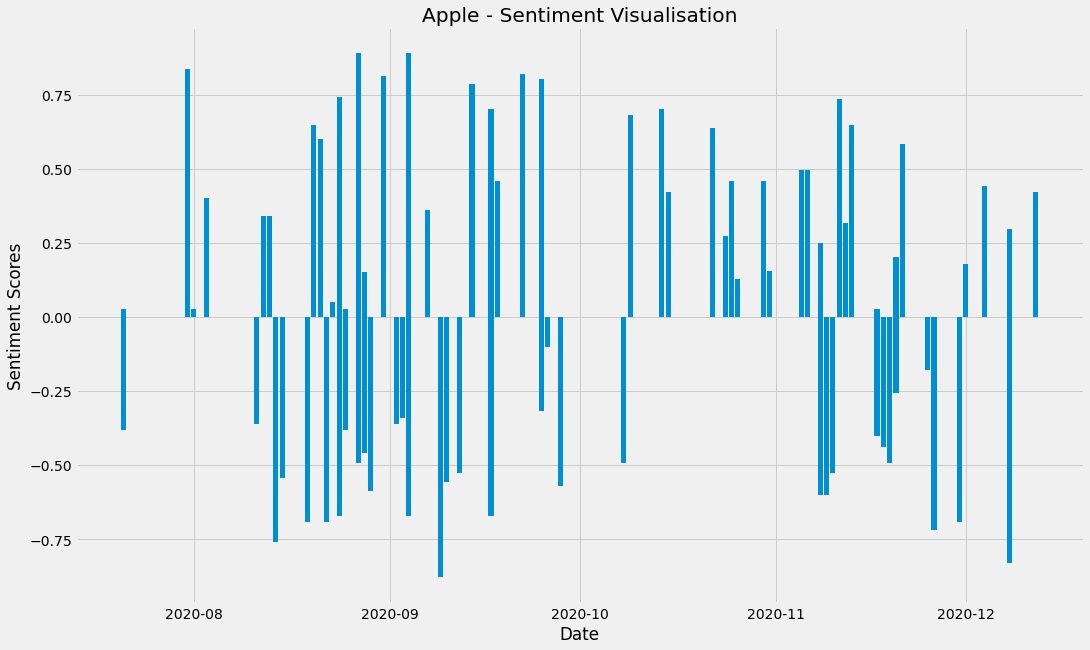

In [ ]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_axes([0,0,1,1])
ax.bar(apple_df['date'], apple_df['sentiment_score'])
ax.set_xlabel('Date')
ax.set_ylabel('Sentiment Scores')
ax.set_title('Apple - Sentiment Visualisation')
plt.show()

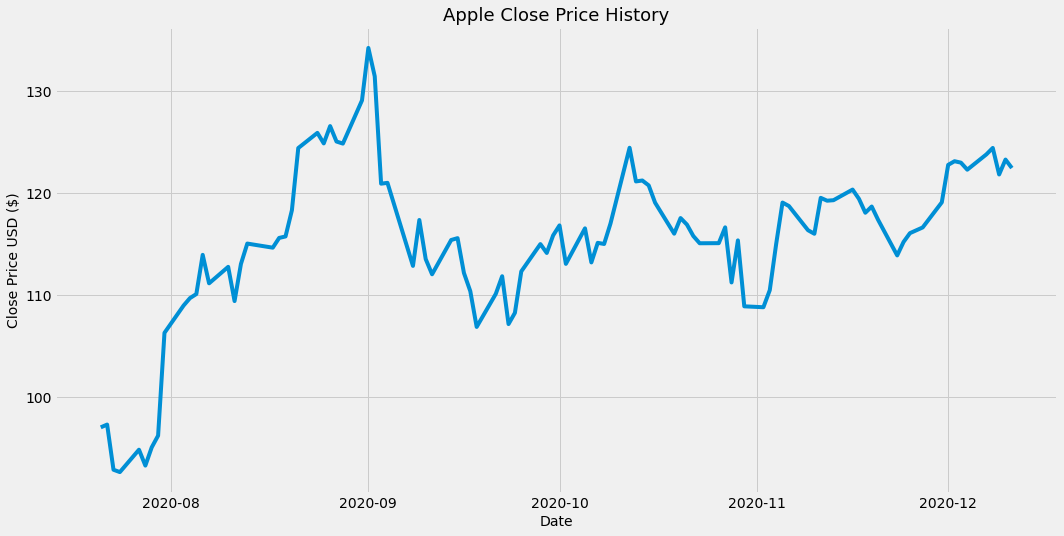

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(apple_stock['Close'])
plt.title('Apple Close Price History',fontsize = 18)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Close Price USD ($)', fontsize = 14)
plt.show()

In [ ]:
apple_df['sentiment_score'].sort_values()

56   -0.8779
1    -0.8316
90   -0.7579
6    -0.7184
5    -0.6908
       ...  
68    0.8126
46    0.8176
96    0.8360
61    0.8885
74    0.8885
Name: sentiment_score, Length: 100, dtype: float64

In [ ]:
apple_df[apple_df['sentiment_score']== -0.8779]

,date,headline,summary,url,combined,clean,sentiment_score
56,2020-09-09,Apple seeks damages from Fortnite maker in App...,[SAN FRANCISCO] Apple on Tuesday asked a US fe...,https://www.businesstimes.com.sg/technology/ap...,Apple seeks damages from Fortnite maker in App...,apple seeks damages fortnite maker app store d...,-0.8779


In [ ]:
print(apple_df.iloc[56]['combined'])

Apple seeks damages from Fortnite maker in App Store dispute [SAN FRANCISCO] Apple on Tuesday asked a US federal court to order Fortnite maker Epic Games to pay damages in a legal dispute over the rules for the iPhone maker's online marketplace.



In [ ]:
apple_stock[apple_stock.index == '2020-09-09']

,High,Low,Open,Close,Volume,Adj Close,Change
Date,,,,,,,
2020-09-09,119.139999,115.260002,117.260002,117.32,176940500.0,117.117943,4.5


In [ ]:
apple_stock[apple_stock.index == '2020-09-10']

,High,Low,Open,Close,Volume,Adj Close,Change
Date,,,,,,,
2020-09-10,120.5,112.5,120.360001,113.489998,182274400.0,113.29454,-3.830002


In [ ]:
apple_df[apple_df['sentiment_score']== -0.8316]

,date,headline,summary,url,combined,clean,sentiment_score
1,2020-12-08,Apple could block apps that don't comply with ...,[STOCKHOLM] Apple threatened on Tuesday to rem...,https://www.businesstimes.com.sg/consumer/appl...,Apple could block apps that don't comply with ...,apple could block apps dont comply new privacy...,-0.8316


In [ ]:
print(apple_df.iloc[1]['combined'])

Apple could block apps that don't comply with new privacy feature [STOCKHOLM] Apple threatened on Tuesday to remove apps from its widely-used App Store if they don't comply with an upcoming private feature allowing users to block advertisers from tracking them across different applications.



In [ ]:
apple_stock[apple_stock.index == '2020-12-08']

,High,Low,Open,Close,Volume,Adj Close,Change
Date,,,,,,,
2020-12-08,124.980003,123.089996,124.370003,124.379997,82225500.0,124.379997,0.629997


In [ ]:
apple_stock[apple_stock.index == '2020-12-09']

,High,Low,Open,Close,Volume,Adj Close,Change
Date,,,,,,,
2020-12-09,125.949997,121.0,124.529999,121.779999,115089200.0,121.779999,-2.599998


In [ ]:
apple_df[apple_df['sentiment_score']== 0.8360]

,date,headline,summary,url,combined,clean,sentiment_score
96,2020-07-31,"Huawei, Apple gain bigger share of shrinking C...",[SHENZHEN] Huawei Technologies and Apple both ...,https://www.businesstimes.com.sg/consumer/huaw...,"Huawei, Apple gain bigger share of shrinking C...",huawei apple gain bigger share shrinking china...,0.836


In [ ]:
print(apple_df.iloc[96]['combined'])

Huawei, Apple gain bigger share of shrinking China smartphone market [SHENZHEN] Huawei Technologies and Apple both increased their share of the China smartphone market in the second quarter of 2020, bucking a broader trend as the overall market for handsets continued to contract.



In [ ]:
apple_stock[apple_stock.index == '2020-07-31']

,High,Low,Open,Close,Volume,Adj Close,Change
Date,,,,,,,
2020-07-31,106.415001,100.824997,102.885002,106.260002,374336800.0,105.886086,10.07


In [ ]:
print(apple_df.iloc[74]['combined'])

New season of 'Fortnite' is here, Apple users miss out [BENGALURU] Epic Games launched the new season of hit video game Fortnite on Thursday, pitting Marvel super heroes against Fantastic Four-villain Galactus in the first update to exclude iPhone and iPad users due to a legal fight with Apple Inc.



In [ ]:
apple_df[apple_df['sentiment_score']== 0.8176]

,date,headline,summary,url,combined,clean,sentiment_score
46,2020-09-22,"Apple CEO impressed by remote work, sees perma...",[LOS ANGELES] Apple chief executive officer (C...,https://www.businesstimes.com.sg/technology/ap...,"Apple CEO impressed by remote work, sees perma...",apple ceo impressed remote work sees permanent...,0.8176


In [ ]:
print(apple_df.iloc[46]['combined'])

Apple CEO impressed by remote work, sees permanent changes [LOS ANGELES] Apple chief executive officer (CEO) Tim Cook said he's been impressed by employees' ability to operate remotely and predicted that some new work habits will remain after the pandemic.



In [ ]:
apple_stock[apple_stock.index == '2020-09-23']

,High,Low,Open,Close,Volume,Adj Close,Change
Date,,,,,,,
2020-09-23,112.110001,106.769997,111.620003,107.120003,150718700.0,106.935509,-4.689995


### Tesla

#### Pre-processing and Data Preparation

In [ ]:
tesla_df.head()

,date,headline,summary,url
0,13 Dec 2020,Are Tesla's shares worth US$90 or US$780? Wall...,[NEW YORK] For all the headline-making drama s...,https://www.businesstimes.com.sg/transport/are...
1,12 Dec 2020,"Short sellers crushed in 2020 as Tesla, Modern...",SHORT sellers won some high-profile victories ...,https://www.businesstimes.com.sg/wealth-invest...
2,09 Dec 2020,"No model for sale here, but India's small inve...",[MUMBAI] Mom-and-pop Indian investors increasi...,https://www.businesstimes.com.sg/stocks/no-mod...
3,08 Dec 2020,Tesla raising up to US$5b in third share sale ...,[SAN CARLOS] Tesla is taking advantage of its ...,https://www.businesstimes.com.sg/transport/tes...
4,04 Dec 2020,Tesla skeptic regrets betting against Musk: re...,[NEW YORK] Prominent investor Jim Chanos ackno...,https://www.businesstimes.com.sg/transport/tes...


In [ ]:
tesla_df['combined'] = tesla_df['headline'] + ' ' + tesla_df['summary']
tesla_df['date'] = pd.to_datetime(tesla_df['date']).dt.date
tesla_df['clean'] = tesla_df['combined'].apply(text_cleaner)
tesla_df.head()

,date,headline,summary,url,combined,clean
0,2020-12-13,Are Tesla's shares worth US$90 or US$780? Wall...,[NEW YORK] For all the headline-making drama s...,https://www.businesstimes.com.sg/transport/are...,Are Tesla's shares worth US$90 or US$780? Wall...,teslas shares worth us90 us780 wall street can...
1,2020-12-12,"Short sellers crushed in 2020 as Tesla, Modern...",SHORT sellers won some high-profile victories ...,https://www.businesstimes.com.sg/wealth-invest...,"Short sellers crushed in 2020 as Tesla, Modern...",short sellers crushed 2020 tesla moderna stock...
2,2020-12-09,"No model for sale here, but India's small inve...",[MUMBAI] Mom-and-pop Indian investors increasi...,https://www.businesstimes.com.sg/stocks/no-mod...,"No model for sale here, but India's small inve...",model sale indias small investors flock tesla ...
3,2020-12-08,Tesla raising up to US$5b in third share sale ...,[SAN CARLOS] Tesla is taking advantage of its ...,https://www.businesstimes.com.sg/transport/tes...,Tesla raising up to US$5b in third share sale ...,tesla raising us5b third share sale year san c...
4,2020-12-04,Tesla skeptic regrets betting against Musk: re...,[NEW YORK] Prominent investor Jim Chanos ackno...,https://www.businesstimes.com.sg/transport/tes...,Tesla skeptic regrets betting against Musk: re...,tesla skeptic regrets betting musk report new ...


In [ ]:
tesla_stock['Change']=tesla_stock['Close'].diff()
tesla_stock.head()

,High,Low,Open,Close,Volume,Adj Close,Change
Date,,,,,,,
2020-02-07,153.949997,146.000000,146.110001,149.613998,85317500.0,149.613998,NaN
2020-02-10,163.998001,150.479996,160.000000,154.255997,123446000.0,154.255997,4.641998
2020-02-11,156.701996,151.600006,153.757996,154.876007,58487500.0,154.876007,0.620010
2020-02-12,157.949997,152.673996,155.574005,153.457993,60112500.0,153.457993,-1.418015
2020-02-13,163.600006,147.000000,148.367996,160.800003,131446500.0,160.800003,7.342010


In [ ]:
web.DataReader('TSLA', data_source='yahoo', start='2020-02-06',end='2020-02-06')

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-02-06,159.166,137.399994,139.983994,149.792007,199404000,149.792007


In [ ]:
tesla_stock.iloc[:1]['Change'] = tesla_stock.iloc[:1]['Close'] - 149.792007
tesla_stock.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,High,Low,Open,Close,Volume,Adj Close,Change
Date,,,,,,,
2020-02-07,153.949997,146.000000,146.110001,149.613998,85317500.0,149.613998,-0.178009
2020-02-10,163.998001,150.479996,160.000000,154.255997,123446000.0,154.255997,4.641998
2020-02-11,156.701996,151.600006,153.757996,154.876007,58487500.0,154.876007,0.620010
2020-02-12,157.949997,152.673996,155.574005,153.457993,60112500.0,153.457993,-1.418015
2020-02-13,163.600006,147.000000,148.367996,160.800003,131446500.0,160.800003,7.342010


#### Sentiment Analysis

In [ ]:
tesla_df['sentiment_score'] = tesla_df['clean'].apply(lambda news: vader.polarity_scores(news)['compound'])
tesla_df.head()

,date,headline,summary,url,combined,clean,sentiment_score
0,2020-12-13,Are Tesla's shares worth US$90 or US$780? Wall...,[NEW YORK] For all the headline-making drama s...,https://www.businesstimes.com.sg/transport/are...,Are Tesla's shares worth US$90 or US$780? Wall...,teslas shares worth us90 us780 wall street can...,0.8481
1,2020-12-12,"Short sellers crushed in 2020 as Tesla, Modern...",SHORT sellers won some high-profile victories ...,https://www.businesstimes.com.sg/wealth-invest...,"Short sellers crushed in 2020 as Tesla, Modern...",short sellers crushed 2020 tesla moderna stock...,-0.7184
2,2020-12-09,"No model for sale here, but India's small inve...",[MUMBAI] Mom-and-pop Indian investors increasi...,https://www.businesstimes.com.sg/stocks/no-mod...,"No model for sale here, but India's small inve...",model sale indias small investors flock tesla ...,0.0000
3,2020-12-08,Tesla raising up to US$5b in third share sale ...,[SAN CARLOS] Tesla is taking advantage of its ...,https://www.businesstimes.com.sg/transport/tes...,Tesla raising up to US$5b in third share sale ...,tesla raising us5b third share sale year san c...,0.6597
4,2020-12-04,Tesla skeptic regrets betting against Musk: re...,[NEW YORK] Prominent investor Jim Chanos ackno...,https://www.businesstimes.com.sg/transport/tes...,Tesla skeptic regrets betting against Musk: re...,tesla skeptic regrets betting musk report new ...,-0.0258


#### Visualisation

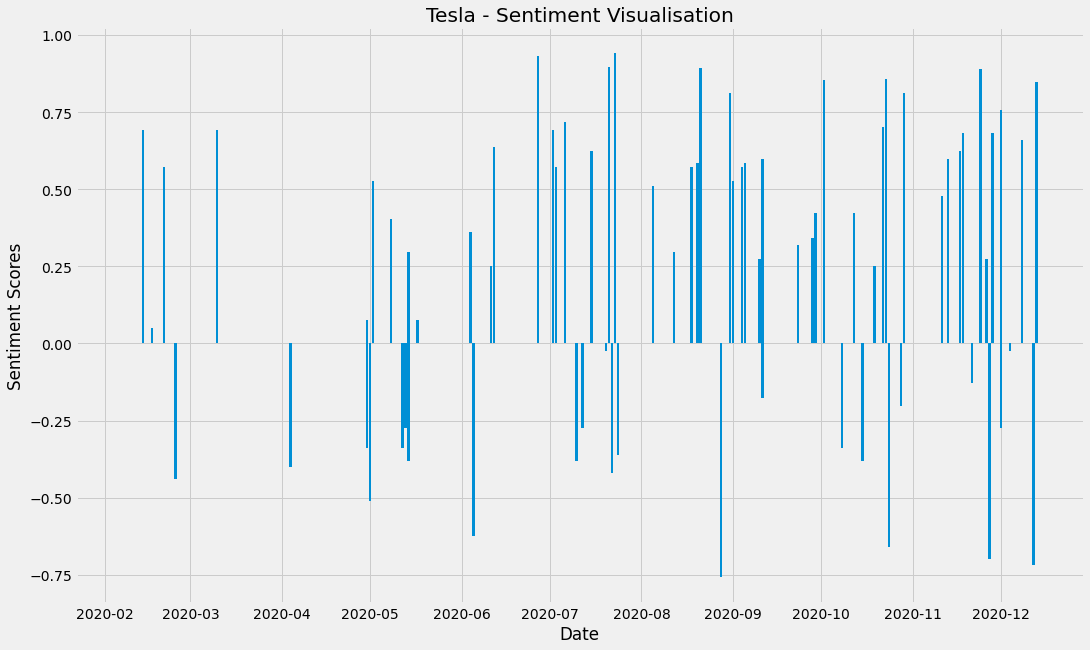

In [ ]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_axes([0,0,1,1])
ax.bar(tesla_df['date'], tesla_df['sentiment_score'])
ax.set_xlabel('Date')
ax.set_ylabel('Sentiment Scores')
ax.set_title('Tesla - Sentiment Visualisation')
plt.show()

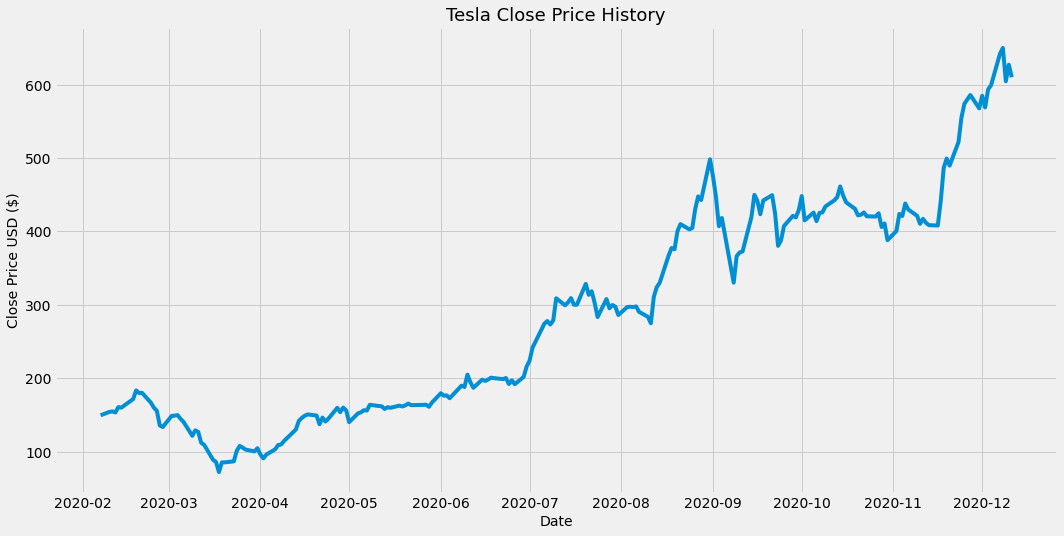

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(tesla_stock['Close'])
plt.title('Tesla Close Price History',fontsize = 18)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Close Price USD ($)', fontsize = 14)
plt.show()

In [ ]:
tesla_df['sentiment_score'].sort_values()

44   -0.7579
1    -0.7184
10   -0.7003
21   -0.6597
71   -0.6249
       ...  
12    0.8910
48    0.8934
56    0.8957
68    0.9330
54    0.9403
Name: sentiment_score, Length: 100, dtype: float64

In [ ]:
tesla_df[tesla_df['sentiment_score']== -0.7579]

,date,headline,summary,url,combined,clean,sentiment_score
44,2020-08-28,Musk confirms Tesla Nevada factory was target ...,[BENGALURU] Elon Musk said on Thursday that Te...,https://www.businesstimes.com.sg/transport/mus...,Musk confirms Tesla Nevada factory was target ...,musk confirms tesla nevada factory target seri...,-0.7579


In [ ]:
print(tesla_df.iloc[44]['combined'])

Musk confirms Tesla Nevada factory was target of 'serious' cyberattack [BENGALURU] Elon Musk said on Thursday that Tesla Inc's factory in Nevada was a target of a "serious"cybersecurity attack, confirming a media report that claimed an employee of the company helped the Federal Bureau of Investigation(FBI) thwart the attack.



In [ ]:
tesla_stock[tesla_stock.index == '2020-08-28']

,High,Low,Open,Close,Volume,Adj Close,Change
Date,,,,,,,
2020-08-28,463.697998,437.303986,459.023987,442.679993,100406000.0,442.679993,-5.070007


In [ ]:
tesla_df[tesla_df['sentiment_score']== -0.6597]

,date,headline,summary,url,combined,clean,sentiment_score
21,2020-10-24,"Tesla to recall 30,000 cars from China over su...",[BEIJING] US electric car manufacturer Tesla w...,https://www.businesstimes.com.sg/transport/tes...,"Tesla to recall 30,000 cars from China over su...",tesla recall 30000 cars china suspension defec...,-0.6597


In [ ]:
print(tesla_df.iloc[21]['combined'])


Tesla to recall 30,000 cars from China over suspension defects [BEIJING] US electric car manufacturer Tesla will recall almost 30,000 vehicles imported into China due to suspension defects, China's market regulator said Friday.



In [ ]:
tesla_stock[tesla_stock.index == '2020-10-26']

,High,Low,Open,Close,Volume,Adj Close,Change
Date,,,,,,,
2020-10-26,425.76001,410.0,411.630005,420.279999,28239200.0,420.279999,-0.350006


In [ ]:
tesla_df[tesla_df['sentiment_score']== 0.9330]

,date,headline,summary,url,combined,clean,sentiment_score
68,2020-06-27,Why you should be glad Audi's E-Tron isn't a T...,YOU probably don't remember your first Interne...,https://www.businesstimes.com.sg/life-culture/...,Why you should be glad Audi's E-Tron isn't a T...,glad audis etron isnt tesla killer probably do...,0.933


In [ ]:
print(tesla_df.iloc[68]['combined'])

Why you should be glad Audi's E-Tron isn't a Tesla killer YOU probably don't remember your first Internet-capable phone (WAP anyone?), but you surely remember your first proper smartphone? For many, that would have been the 2007 Apple iPhone, which simply did what it promised: it put the Internet in your hand.



In [ ]:
tesla_stock[tesla_stock.index == '2020-06-29']

,High,Low,Open,Close,Volume,Adj Close,Change
Date,,,,,,,
2020-06-29,202.0,189.703995,193.802002,201.869995,45132000.0,201.869995,9.921997


In [ ]:
tesla_df[tesla_df['sentiment_score']== 0.8957]

,date,headline,summary,url,combined,clean,sentiment_score
56,2020-07-21,Tesla share rally propels some early fan inves...,[SEOUL] Convinced of Tesla Inc's imminent mete...,https://www.businesstimes.com.sg/transport/tes...,Tesla share rally propels some early fan inves...,tesla share rally propels early fan investors ...,0.8957


In [ ]:
print(tesla_df.iloc[56]['combined'])

Tesla share rally propels some early fan investors to riches [SEOUL] Convinced of Tesla Inc's imminent meteoric rise, Orestis Palampougioukis, a Netherlands-based software developer, took out a 43,000 euro (S$68,150) loan in early October to invest it all in the electric carmaker, which at the time was trading at around US$230 a share.



In [ ]:
tesla_stock[tesla_stock.index == '2020-07-22']

,High,Low,Open,Close,Volume,Adj Close,Change
Date,,,,,,,
2020-07-22,325.283997,312.399994,319.799988,318.466003,70805500.0,318.466003,4.794006


### Netflix

#### Pre-processing and Data Preparation

In [ ]:
netflix_df.head()

,date,headline,summary,url
0,09 Dec 2020,Viacom poised to win suit over Netflix talent ...,[LOS ANGELES] A ViacomCBS unit is poised to wi...,https://www.businesstimes.com.sg/consumer/viac...
1,04 Dec 2020,Netflix hit 'The Crown' blasted for anti-Charl...,[LONDON] The fourth season of Netflix hit The ...,https://www.businesstimes.com.sg/life-culture/...
2,03 Dec 2020,Netflix plans to double its spending on origin...,NETFLIX Inc is planning to double its spending...,https://www.businesstimes.com.sg/consumer/netf...
3,03 Nov 2020,Will Mank be Netflix's first Best Picture winner?,CITIZEN Kane has cast a vast cinematic shadow ...,https://www.businesstimes.com.sg/life-culture/...
4,24 Oct 2020,Apple and Netflix discussed acquiring 'Bond' m...,[LOS ANGELES] Metro-Goldwyn-Mayer held discuss...,https://www.businesstimes.com.sg/technology/ap...


In [ ]:
netflix_df['combined'] = netflix_df['headline'] + ' ' + netflix_df['summary']
netflix_df['date'] = pd.to_datetime(netflix_df['date']).dt.date
netflix_df['clean'] = netflix_df['combined'].apply(text_cleaner)
netflix_df.head()

,date,headline,summary,url,combined,clean
0,2020-12-09,Viacom poised to win suit over Netflix talent ...,[LOS ANGELES] A ViacomCBS unit is poised to wi...,https://www.businesstimes.com.sg/consumer/viac...,Viacom poised to win suit over Netflix talent ...,viacom poised win suit netflix talent poaching...
1,2020-12-04,Netflix hit 'The Crown' blasted for anti-Charl...,[LONDON] The fourth season of Netflix hit The ...,https://www.businesstimes.com.sg/life-culture/...,Netflix hit 'The Crown' blasted for anti-Charl...,netflix hit crown blasted anticharles bias lon...
2,2020-12-03,Netflix plans to double its spending on origin...,NETFLIX Inc is planning to double its spending...,https://www.businesstimes.com.sg/consumer/netf...,Netflix plans to double its spending on origin...,netflix plans double spending original content...
3,2020-11-03,Will Mank be Netflix's first Best Picture winner?,CITIZEN Kane has cast a vast cinematic shadow ...,https://www.businesstimes.com.sg/life-culture/...,Will Mank be Netflix's first Best Picture winn...,mank netflixs first best picture winner citize...
4,2020-10-24,Apple and Netflix discussed acquiring 'Bond' m...,[LOS ANGELES] Metro-Goldwyn-Mayer held discuss...,https://www.businesstimes.com.sg/technology/ap...,Apple and Netflix discussed acquiring 'Bond' m...,apple netflix discussed acquiring bond movie s...


In [ ]:
netflix_stock['Change']=netflix_stock['Close'].diff()
netflix_stock.head()

,High,Low,Open,Close,Volume,Adj Close,Change
Date,,,,,,,
2018-10-16,347.950012,330.559998,337.239990,346.399994,20156400,346.399994,NaN
2018-10-17,380.000000,356.500000,378.329987,364.700012,32610900,364.700012,18.300018
2018-10-18,362.200012,346.049988,360.670013,346.709991,18461000,346.709991,-17.990021
2018-10-19,355.799988,332.200012,351.000000,332.670013,16717200,332.670013,-14.039978
2018-10-22,335.799988,320.339996,333.100006,329.540009,17097200,329.540009,-3.130005


In [ ]:
web.DataReader('NFLX', data_source='yahoo', start='2018-10-15',end='2018-10-15')

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-10-15,339.209991,326.929993,337.630005,333.130005,11215000,333.130005


In [ ]:
netflix_stock.iloc[:1]['Change'] = netflix_stock.iloc[:1]['Close'] - 333.130005
netflix_stock.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,High,Low,Open,Close,Volume,Adj Close,Change
Date,,,,,,,
2018-10-16,347.950012,330.559998,337.239990,346.399994,20156400,346.399994,13.269989
2018-10-17,380.000000,356.500000,378.329987,364.700012,32610900,364.700012,18.300018
2018-10-18,362.200012,346.049988,360.670013,346.709991,18461000,346.709991,-17.990021
2018-10-19,355.799988,332.200012,351.000000,332.670013,16717200,332.670013,-14.039978
2018-10-22,335.799988,320.339996,333.100006,329.540009,17097200,329.540009,-3.130005


#### Sentiment Analysis

In [ ]:
netflix_df['sentiment_score'] = netflix_df['clean'].apply(lambda news: vader.polarity_scores(news)['compound'])
netflix_df.head()

,date,headline,summary,url,combined,clean,sentiment_score
0,2020-12-09,Viacom poised to win suit over Netflix talent ...,[LOS ANGELES] A ViacomCBS unit is poised to wi...,https://www.businesstimes.com.sg/consumer/viac...,Viacom poised to win suit over Netflix talent ...,viacom poised win suit netflix talent poaching...,0.8957
1,2020-12-04,Netflix hit 'The Crown' blasted for anti-Charl...,[LONDON] The fourth season of Netflix hit The ...,https://www.businesstimes.com.sg/life-culture/...,Netflix hit 'The Crown' blasted for anti-Charl...,netflix hit crown blasted anticharles bias lon...,-0.4939
2,2020-12-03,Netflix plans to double its spending on origin...,NETFLIX Inc is planning to double its spending...,https://www.businesstimes.com.sg/consumer/netf...,Netflix plans to double its spending on origin...,netflix plans double spending original content...,0.8225
3,2020-11-03,Will Mank be Netflix's first Best Picture winner?,CITIZEN Kane has cast a vast cinematic shadow ...,https://www.businesstimes.com.sg/life-culture/...,Will Mank be Netflix's first Best Picture winn...,mank netflixs first best picture winner citize...,0.9493
4,2020-10-24,Apple and Netflix discussed acquiring 'Bond' m...,[LOS ANGELES] Metro-Goldwyn-Mayer held discuss...,https://www.businesstimes.com.sg/technology/ap...,Apple and Netflix discussed acquiring 'Bond' m...,apple netflix discussed acquiring bond movie s...,0.2732


#### Visualisation

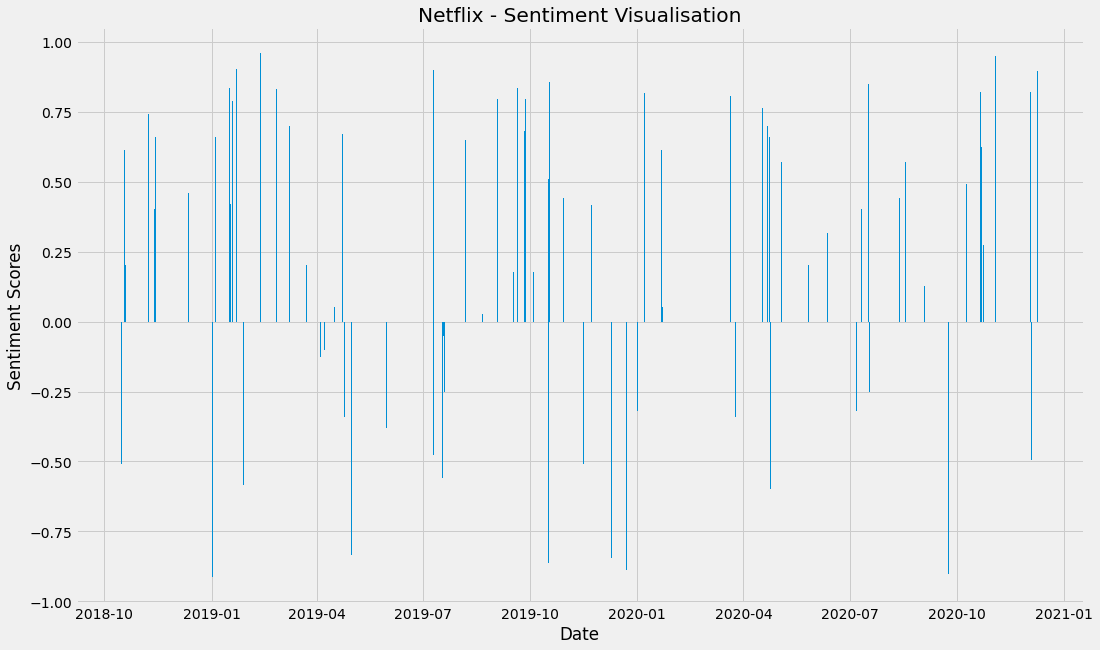

In [ ]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_axes([0,0,1,1])
ax.bar(netflix_df['date'], netflix_df['sentiment_score'])
ax.set_xlabel('Date')
ax.set_ylabel('Sentiment Scores')
ax.set_title('Netflix - Sentiment Visualisation')
plt.show()

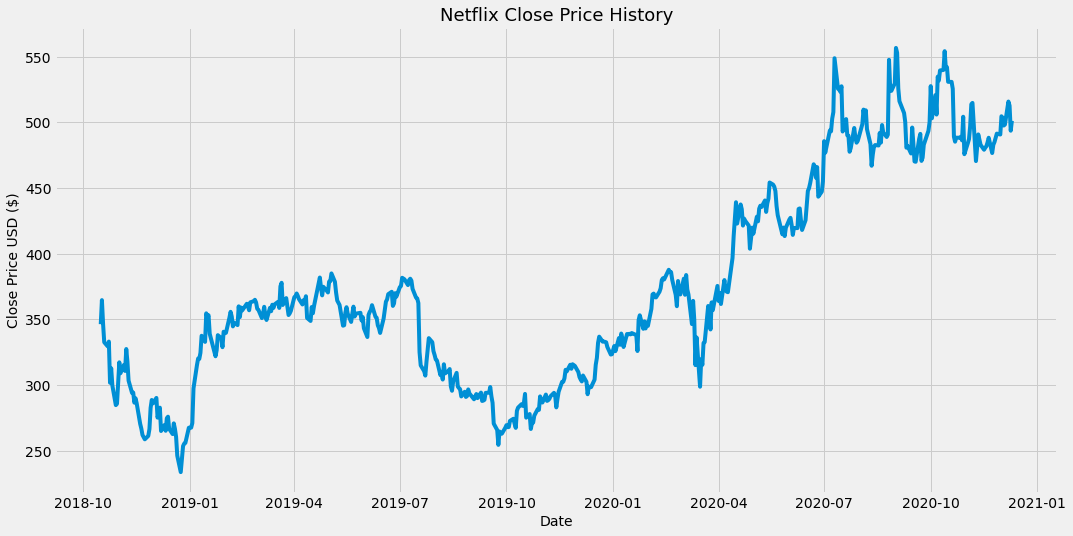

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(netflix_stock['Close'])
plt.title('Netflix Close Price History',fontsize = 18)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Close Price USD ($)', fontsize = 14)
plt.show()

In [ ]:
netflix_df['sentiment_score'].sort_values()

85   -0.9136
8    -0.9022
33   -0.8885
43   -0.8625
36   -0.8442
       ...  
62    0.9013
80    0.9022
3     0.9493
98    0.9559
78    0.9590
Name: sentiment_score, Length: 100, dtype: float64

In [ ]:
netflix_df[netflix_df['sentiment_score']== -0.9136]

,date,headline,summary,url,combined,clean,sentiment_score
85,2019-01-02,Netflix blocks show in Saudi Arabia critical o...,[NEW YORK] Netflix has blocked an episode of i...,https://www.businesstimes.com.sg/consumer/netf...,Netflix blocks show in Saudi Arabia critical o...,netflix blocks show saudi arabia critical saud...,-0.9136


In [ ]:
print(netflix_df.iloc[85]['combined'])

Netflix blocks show in Saudi Arabia critical of Saudi Prince [NEW YORK] Netflix has blocked an episode of its show "Patriot Act With Hasan Minhaj" from streaming in Saudi Arabia after the Saudi government complained that the episode — which is critical of Crown Prince Mohammed bin Salman — violated its cybercrime laws.


In [ ]:
netflix_stock[netflix_stock.index == '2019-01-02']

,High,Low,Open,Close,Volume,Adj Close,Change
Date,,,,,,,
2019-01-02,269.75,256.579987,259.279999,267.660004,11679500,267.660004,0.0


In [ ]:
netflix_df[netflix_df['sentiment_score']== -0.8885]

,date,headline,summary,url,combined,clean,sentiment_score
33,2019-12-23,Netflix price cuts are heating up India's stre...,[MUMBAI] Netflix Inc and its rivals are facing...,https://www.businesstimes.com.sg/consumer/netf...,Netflix price cuts are heating up India's stre...,netflix price cuts heating indias streaming wa...,-0.8885


In [ ]:
print(netflix_df.iloc[33]['combined'])

Netflix price cuts are heating up India's streaming war [MUMBAI] Netflix Inc and its rivals are facing a price war in India as a jump in the cost of watching video on mobile phones threatens to slow demand in what is shaping up as a key growth market globally for streaming.



In [ ]:
netflix_stock[netflix_stock.index == '2019-01-02']

,High,Low,Open,Close,Volume,Adj Close,Change
Date,,,,,,,
2019-01-02,269.75,256.579987,259.279999,267.660004,11679500,267.660004,0.0


In [ ]:
netflix_df[netflix_df['sentiment_score']== -0.8442]

,date,headline,summary,url,combined,clean,sentiment_score
36,2019-12-10,Netflix could lose 4 million US subscribers in...,[NEW YORKA] Needham and Co was the fourth Wall...,https://www.businesstimes.com.sg/consumer/netf...,Netflix could lose 4 million US subscribers in...,netflix could lose 4 million us subscribers 20...,-0.8442


In [ ]:
print(netflix_df.iloc[36]['combined'])

Netflix could lose 4 million US subscribers in 2020  [NEW YORKA] Needham and Co was the fourth Wall Street brokerage in two months to cut its rating for Netflix Inc on Tuesday, arguing competition from new streaming services could lead to the loss of 4 million premium US subscribers next year.


In [ ]:
netflix_stock[netflix_stock.index == '2019-12-10']

,High,Low,Open,Close,Volume,Adj Close,Change
Date,,,,,,,
2019-12-10,298.940002,292.019989,296.119995,293.119995,10476100,293.119995,-9.380005


In [ ]:
netflix_df[netflix_df['sentiment_score']== 0.9590]

,date,headline,summary,url,combined,clean,sentiment_score
78,2019-02-12,Netflix's Roma takes Bafta glory,"NETFLIX production Roma, a cinematic love lett...",https://www.businesstimes.com.sg/life-culture/...,Netflix's Roma takes Bafta glory NETFLIX produ...,netflixs roma takes bafta glory netflix produc...,0.959


In [ ]:
print(netflix_df.iloc[78]['combined'])

Netflix's Roma takes Bafta glory NETFLIX production Roma, a cinematic love letter to director Alfonso Cuaron's childhood in Mexico City, triumphed at the Bafta film awards on Sunday, boosting its Oscar hopes.


In [ ]:
netflix_stock[netflix_stock.index == '2019-02-12']

,High,Low,Open,Close,Volume,Adj Close,Change
Date,,,,,,,
2019-02-12,360.0,346.519989,348.089996,359.970001,10429400,359.970001,14.23999


In [ ]:
netflix_df[netflix_df['sentiment_score']== 0.9559]

,date,headline,summary,url,combined,clean,sentiment_score
98,2018-10-17,"Netflix surges on user gains, strong profits",[SAN FRANCISCO] Netflix reported on Tuesday a ...,https://www.businesstimes.com.sg/consumer/netf...,"Netflix surges on user gains, strong profits [...",netflix surges user gains strong profits san f...,0.9559


In [ ]:
print(netflix_df.iloc[98]['combined'])

Netflix surges on user gains, strong profits [SAN FRANCISCO] Netflix reported on Tuesday a strong jump in profits and better-than-expected growth in users in the past quarter, sparking a rally in shares of the streaming television market leader.


In [ ]:
netflix_stock[netflix_stock.index == '2018-10-17']

,High,Low,Open,Close,Volume,Adj Close,Change
Date,,,,,,,
2018-10-17,380.0,356.5,378.329987,364.700012,32610900,364.700012,18.300018


### Findings

In the project I tried to answer the question **" Is there any relationship between stock market news and stock market prices?"** by comparing sentiment analysis of specific news and stock prices of that news' date. 

Our visualisation plots show the correlation between news and stock values. 
When we check the sentiment scores and close value of that day of particular day, the positive or negative news sentiment scores affects the  close stock price of that particular. 

As a result, I successfully achieved my project goal by proofing the relationship between stock news and stock market prices.
